# 量子写像系


次の時間に依存する量子化されたハミルトニアン

$$
\hat{H}(\hat{q},\hat{p},t) = T(\hat{p}) + V(\hat{q})\sum_{n=-\infty}^{\infty}\delta(t-n) \tag{1}
$$

を考えます．第二項はポテンシャル項による摂動が時刻$t=n (n=\cdots,-1,0,1,\cdots)$ にのみ離散的に印加されていることを表しています．
量子化は正準量子化条件 $[\hat{q},\hat{p}]=i\hbar$，すなわち

$$
\hat{q}\ket{q} = q\ket{q},\qquad \hat{p}\ket{q} = \frac{\hbar}{i}\frac{d}{dq}\ket{q}
$$

である．与えられた状態を$\phi$として$n$回目の撃力から$n+1$回目の撃力までの時間発展演算子は

$$
\begin{split}
\ket{\phi_{n+1}}=\hat{U}\ket{\phi_n}, \qquad \hat{U}=e^{-\frac{i}{\hbar} T(\hat{p})} e^{-\frac{i}{\hbar}V(\hat{q})}
\end{split} 
$$

によって記述されます． SimpleQmapを使って量子化された標準写像における状態の時間発展を計算してみます．
尚$q$及び$p$は離散フーリエ変換を用いた計算であるため周期境界条件が課されます．

## 例題1: 時間発展

In [1]:
# ipython notebook を使用しない場合は下記コマンドは無視して下さい
%matplotlib inline

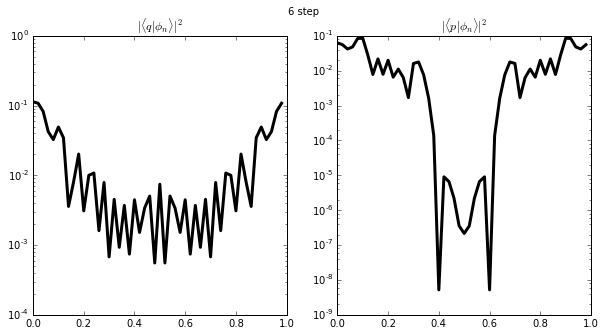

In [2]:
import SimpleQmap as sq
import numpy as np
import matplotlib.pyplot as plt

dim = 50
k = 1
qmin, qmax = 0, 1
pmin, pmax = 0, 1

tmax = 6
cmap = sq.StandardMap(k=k)

domain = [[qmin,qmax],[pmin,pmax]]
qmap = sq.Qmap(cmap, dim, domain) # defines the quantum system
state = qmap.getState().cs(0.0,0.0) # coherent state centered at (q,p) = (0,0)
qmap.setInit(state) # set intial condition

fig, axs = plt.subplots(1,2,figsize=(10,5))

for i in range(1,tmax+1):
    qmap.evolve() # calculate: | psi_1 > = U | psi_0 > then  |phi_0> = |phi_1>

#state.savetxt("evolve_qrep_%dstep.dat" % i, rep="p") # rep = "q", "p" or "hsm"
state = qmap.getIn() # return | phi_0>
axs[0].plot(state.x[0], state.qrep().abs2(),'-k',lw=3)
axs[1].plot(state.x[1], state.prep().abs2(),'-k',lw=3)

for ax in axs:
    ax.semilogy()
axs[0].set_title(r"$|\langle q | \phi_n\rangle|^2$")
axs[1].set_title(r"$|\langle p | \phi_n\rangle|^2$")
fig.suptitle("%d step" % i)
plt.show()

波動関数を保存する場合savetxt関数を使う事をおすすめします．
1step 毎にデータを確認したいならば， fig.axs = plt.subplot(1,2) 以降の行を次の様に置き換えればよいでしょう．
ターミナルでEnterを押すと次のstepの計算に入ります．

Note:
    spyder や ipython notebooke 環境では適切に動かないかもしれません．

In [ ]:
fig, axs = plt.subplots(1,2)
plt.ion()
plt.show()
for i in range(tmax+1):
    #state.savetxt("evolve_qrep_%dstep.dat" % i, rep="p") # rep = "q", "p" or "hsm"
    state = qmap.getIn() # return | phi_0>
    axs[0].plot(state.x[0], state.qrep().abs2(),'-k',lw=3)
    axs[1].plot(state.x[1], state.prep().abs2(),'-k',lw=3)

    for ax in axs:
        ax.semilogy()
        axs[0].set_title(r"$|\langle q | \phi_n\rangle|^2$")
        axs[1].set_title(r"$|\langle p | \phi_n\rangle|^2$")
    fig.suptitle("%d step" % i)
    fig.canvas.draw()
    _ = input("Press enter (or Ctrl-C to exit):")
    for ax in axs:
        ax.cla()

    qmap.evolve() # calculate: | psi_1 > = U | psi_0 > then  |phi_0> = |phi_1>


## 伏見表示

通常の量子力学では不確定性関係に$q$- 及び $p$-表示しか気にしませんが，(擬)位相空間表示である伏見表示やWigner表示は量子古典対応を考える上で非常に強力な表示とないます．
Wigner表示は実装していないのでここでは伏見表示のみ説明します．

与えられた波動関数$\ket{\phi}$とします．
$q$方向及び$p$方向に$\sqrt{2\pi\hbar}$程度の広がりを持つ規格化されたGauss波束(最小波束)は

$$
\bracket{q}{\alpha_{(q_i,p_j)}} = \exp[-(q-q_i)^2/2\hbar + p_j(q-q_i)/\hbar]
$$

であたえられます． 
いま，位相空間を適当なgrid を引いてその格子点$(q_i,p_j)$上に置かれた$\ket{\alpha_{q_i,p_j}}$と$\ket{\phi}$の内積(重なり積分)
を考えたもの

$$
h(q_i,p_j) = |\bracket{\alpha_{q_i,p_j}}{\phi}|^2
$$

が伏見表示となります．注意しなければならいのは波動関数の $q$ -表示から $p$ -表示の変換は可逆ですが，
伏見表示から$q$- や$p$-表示に戻すことはできません．
また伏見表示の波動関数の情報は不確定性関係程度 $\Delta q \Delta p \simeq 2\pi\hbar$ ，
すなわち古典力学と比較して粗視化されている事に気をつけて下さい．

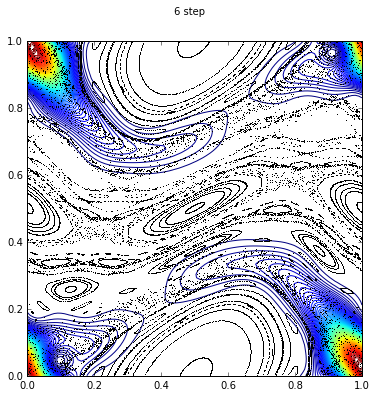

In [3]:
import SimpleQmap as sq
import numpy as np
import matplotlib.pyplot as plt

def Traj(map,sample=50,tmax=500):
    q = np.random.random(sample)
    p = (np.random.random(sample) -0.5) * (pmax - pmin) * 2
    res = [np.array([])]*2
    for i in range(tmax):
        pp = p - map.func0(q)
        qq = q + map.func1(pp)
        q = qq - np.floor(qq)
        p = pp - np.floor(pp)
        res[0] = np.append(res[0],q)
        res[1] = np.append(res[1],p)
    return res

dim = 50
k = 1
qmin, qmax = 0, 1
pmin, pmax = 0, 1 

tmax = 6
cmap = sq.StandardMap(k=k)
domain = [[qmin,qmax],[pmin,pmax]]
qmap = sq.Qmap(cmap, dim, domain) # defines the quantum system
state = qmap.getState().cs(0.0,0.0) # coherent state centered at (q,p) = (0,0)
qmap.setInit(state) # set intial condition

fig, ax = plt.subplots(1,1,figsize=(6,6))

for i in range(1,tmax+1):
    qmap.evolve() # calculate: | psi_1 > = U | psi_0 > then  |phi_0> = |phi_1>

traj = Traj(cmap)
#state.savetxt("evolve_qrep_%dstep.dat" % i, rep="p") # rep = "q", "p" or "hsm"
state = qmap.getIn() # return | phi_0>
x,y,z = state.hsmrep(col=100,row=100)
ax.contour(x,y,z,100)
ax.plot(traj[0],traj[1],',k')
fig.suptitle("%d step" % i)
plt.show()

一応 SimpleQmapでは伏見表示及びq,p表示を同時に表示する方法も提供しています．
サンプルプログラムは以下の通りです(ipython notebook 環境では動かないとおもいます)．

In [ ]:
import SimpleQmap as sq
import numpy as np
import matplotlib.pyplot as plt

def Traj(map,sample=100,tmax=500):
    q = np.random.random(sample)
    p = (np.random.random(sample) -0.5) * (pmax - pmin) * 2
    res = [np.array([])]*2
    for i in range(tmax):
        pp = p - map.func0(q)
        qq = q + map.func1(pp)
        q = qq - np.floor(qq)
        p = pp - np.floor(pp)
        res[0] = np.append(res[0],q)
        res[1] = np.append(res[1],p)
    return res

dim = 50
k = 1
qmin, qmax = 0, 1
pmin, pmax = 0, 1 

tmax = 20
map = sq.StandardMap(k=k)

traj = Traj(map)

domain = [[qmin,qmax],[pmin,pmax]]
qmap = sq.Qmap(map, dim, domain) # defines the quantum system
state = qmap.getState().cs(0.0,0.0) # coherent state centered at (q,p) = (0,0)
qmap.setInit(state) # set intial condition

fig = plt.figure(figsize=(8,8))
plt.ion() # interactive mode of matplotlib
plt.show()

state = qmap.getIn()
for i in range(tmax+1):
    #state.savetxt("evolve_qrep_%d.dat"  % i,rep="p") # rep = "q", "p" or "hsm"
    
    ax0,ax1,ax2 = sq.utility.hsm_axes(fig)
    # drawing husimi-rep.
    x,y, z = state.hsmrep(50,50)
    ax0.contourf(x,y,z,50,cmap = sq.utility.hsm_cmap)
    ax0.plot(traj[0],traj[1],',k')
    ax0.set_xlim(qmin,qmax)
    ax0.set_ylim(qmin,qmax)
    
    # drawing q-rep
    ax1.plot(state.x[0], state.qrep().abs2(),'-k',lw=3)
    ax1.semilogy()
    ax1.set_xlim(qmin,qmax)
    ax1.set_ylim(1e-20,1)
    
    # drawing p-rep
    ax2.plot(state.prep().abs2(), state.x[1],'-k',lw=3)
    ax2.semilogx()
    ax2.set_ylim(qmin,qmax)
    ax2.set_xlim(1e-20,1)
    xtics =ax2.get_xticklabels()
    xtics[0].set_rotation(-90)
    
    
    fig.suptitle("%d-step" % i)
    
    fig.canvas.draw()
    _ = input("Press enter (or Ctrl-C to exit):")
    for ax in [ax0,ax1,ax2]:
        ax.clear()
    
    qmap.evolve() # calculate: | psi_1 > = U | psi_0 >
    state = qmap.getIn() # return: | psi_0 >

## 例題2: 固有値問題

$\hat{U}$の固有値問題を

$$
\hat{U}\ket{\Psi_j} = u_j \ket{\Psi_j}, \qquad u_j = e^{-\frac{i}{\hbar}E_j}
$$
とする． ユニタリー行列の固有ベクトル$\ket{\Psi_j}$ は正規直交系であるので，
時刻$t=n$での状態$\ket{\phi_n}$ (一般に任意の状態)は固有状態の重ねあわせによって記述されます．
すなわち，

$$
\ket{\phi_n}& =\hat{U}^n\ket{\phi_0}\\
& = \sum_j u_j^n \bracket{\Psi_j}{\phi_0}\ket{\Psi_j}
$$

であり，固有ベクトルがわかれば，例題1の様に時間発展を明示的に行う必要性はありません．
しかしこのことは時間発展がのmethodが不要と言うわけではありません．
このことは次に説明します．

SimpleQmapでは固有値，及び固有ベクトルの取得は以下のようにして行います

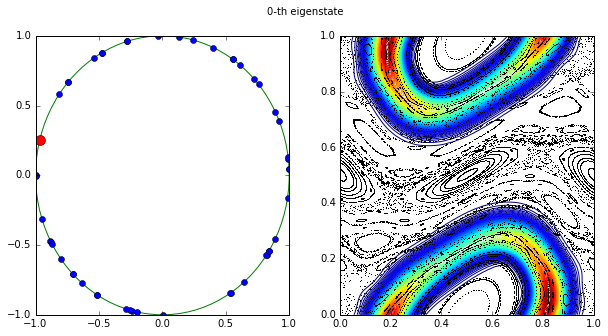

In [4]:
import SimpleQmap as sq
import numpy as np
import matplotlib.pyplot as plt

def Traj(map,sample=50,tmax=500):
    q = np.random.random(sample)
    p = (np.random.random(sample) -0.5) * (pmax - pmin) * 2
    res = [np.array([])]*2
    for i in range(tmax):
        pp = p - map.func0(q)
        qq = q + map.func1(pp)
        q = qq - np.floor(qq)
        p = pp - np.floor(pp)
        res[0] = np.append(res[0],q)
        res[1] = np.append(res[1],p)
    return res


dim = 50
k = 1
qmin, qmax = 0, 1
pmin, pmax = 0, 1 

map = sq.StandardMap(k=k)

traj = Traj(map)

domain = [[qmin,qmax],[pmin,pmax]]
qmap = sq.Qmap(map, dim, domain) # defines the quantum system
evals, evecs = qmap.eigen() # return eigenvalues and list of eigenvector of the system. 


for i, evec in enumerate(evecs):
    fig,axs = plt.subplots(1,2,figsize=(10,5))

    #evec.savetxt("data.dat",rep="p") # rep = "q", "p" or "hsm"
    
    theta = np.linspace(-np.pi, np.pi, 100)
    z = np.exp(1.j*theta)
    axs[0].plot(z.real, z.imag,'-g')
    axs[0].plot(evals.real, evals.imag, 'ob')
    axs[0].plot(evals[i].real, evals[i].imag, 'or', markersize=10)

    x,y,z = evec.hsmrep(row=100,col=100)
    axs[1].contour(x,y,z,100)
    axs[1].plot(traj[0],traj[1],',k')
    
    fig.suptitle("%d-th eigenstate" % i)
    plt.show()
    break 

固有値が求まっているので，時間発展は次のようにして求めれば良いであろう．

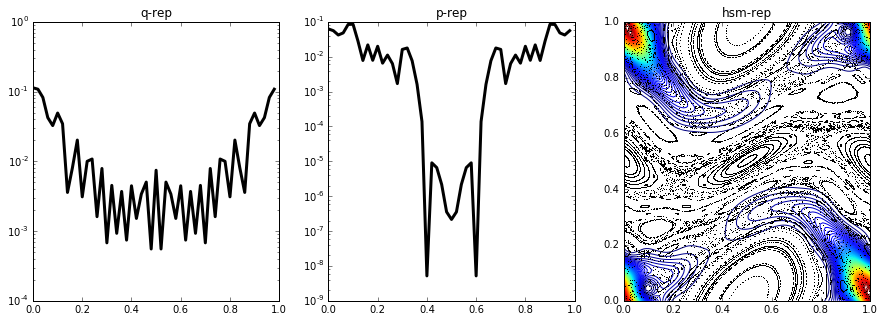

In [5]:
def evolve(n, init, evals, evecs):
    coeff =[init.inner(psi) for psi in evecs] # list of <psi_j | init>
    term = [evals[i]**n*coeff[i] * psi for i, psi in enumerate(evecs)]
    return sq.State(evecs[0].scaleinfo, sum(term))

fig,axs = plt.subplots(1,3,figsize=(15,5))
evals, evecs = qmap.eigen() # return eigenvalues and list of eigenvector of the system. 
init = qmap.getState().cs(0.0,0.0) 

vec = evolve(6, init, evals, evecs)

axs[0].plot(vec.x[0], vec.qrep().abs2() ,'-k',lw=3)
axs[0].set_title("q-rep")
axs[0].semilogy()

axs[1].plot(vec.x[0], vec.prep().abs2() ,'-k',lw=3)
axs[1].set_title("p-rep")
axs[1].semilogy()

x,y,z= vec.hsmrep(col=100,row=100)
axs[2].contour(x,y,z,100)
axs[2].plot(traj[0],traj[1], ',k')
axs[2].set_title("hsm-rep")

plt.show()


numpy では数値対角化(lapack)は比較的容易に提供されており，
固有ベクトルの取得は容易ですが，行列の次元が増大すると対角化に要する時間が大きくなります．
また，数値的に固有ベクトルが求まったっとしても固有ベクトルの解釈が単純ではありません．
カオス系(非可積分系)では固有関数の量子化条件(量子古典対応)が一般に分かっておらず，
数値的に得られた固有ベクトの疑義の無い解釈を与える事ができません．
一方状態の時間発展$\ket{\phi_n}$に関しては半古典的解釈が可能であり，比較的解析方法が確立されています．